In [12]:
import pandas as pd
import json
import numpy as np
from os import listdir
from io import StringIO
from Bio import Phylo, AlignIO
from Bio.Alphabet import generic_dna
import re

path="/home/maeperez/scratch/Clams/hyphy2.5/gard_LCB/"
aln_breakdown='../mauve_alignments/core_ALL_alignments/'
path_out="/home/maeperez/projects/def-bacc/maeperez/Clams/VesicSymb_Evolution/dowstream_analyses_and_data/"
path_to_files='../mauve_alignments/core_ALL_alignments/'


In [13]:

genes=[]
for file in listdir(path):
    if file[-4:]=="json":
        genes+=[str(file.split('.')[0])]
genes=sorted(genes)
print(len(genes))


716


In [3]:
path_to_files='../mauve_alignments/core_ALL_alignments/'
with open(path_to_files+'filelist','r') as f:
    lines=[file[8:-6] for file in f.read().splitlines()]

failed_gard=sorted(set(lines)-set(genes))
failed_gard_idx=[lines.index(gene)+1 for gene in failed_gard]
print(len(failed_gard))
print('\n'.join([' '.join(map(str,item)) for item in list(zip(failed_gard_idx,failed_gard))]))
','.join(map(str,failed_gard_idx))


0



''

In [14]:
filenames=[]
with_recombination=[]
for gene in genes:
    remote_file = open(path+gene+'.GARD.json')
    gard_json = json.load(remote_file)
    breakpoints=[0]+[gard_json['input']['number of sites']]
    
    if 'improvements' not in gard_json.keys():
        pass
        
    else: 
        best_AICc=sum([gard_json['improvements'][bp]['deltaAICc'] for bp in gard_json['improvements'].keys()])+gard_json['baselineScore']
        AICc_ratio=float(gard_json['singleTreeAICc'])/best_AICc
        if AICc_ratio>=1:
            with_recombination+=[gene]
            
            ### Find all puttive breakpoints
            breakpoints=[0]+[gard_json['breakpointData'][k]['bps'][0][1] for k in gard_json['breakpointData'].keys()]
#             print(breakpoints)
            
    ### break alignment at all putative breakpoints ###
    alignment = AlignIO.read(path_to_files+gene+'.fasta', "fasta",alphabet=generic_dna)
    start=breakpoints.pop(0)
    sub=0
    while len(breakpoints)>0:
        sub+=1
        end=breakpoints.pop(0)
        new_aln= alignment[:,start:end]

        for record in new_aln:
            record.id = record.id.split('/')[-2].split('_')[0].replace('.gbk','')

        new_aln.sort()
        filename=gene+'_'+str(sub)+'_'+str(start)+'to'+str(end)+'.nex'
        filenames+=filename

        AlignIO.write([new_aln],aln_breakdown+'nex/'+filename, "nexus")
        print(filename)

        start=end

print( 'number of genes that failed AICc test ',len(with_recombination),"/",len(genes))        

LCB_001_1_0to336.nex
LCB_001_2_336to684.nex
LCB_001_3_684to1390.nex
LCB_002_1_0to68.nex
LCB_002_2_68to1154.nex
LCB_003_1_0to2427.nex
LCB_004_1_0to372.nex
LCB_004_2_372to888.nex
LCB_005_1_0to652.nex
LCB_006_1_0to190.nex
LCB_006_2_190to2609.nex
LCB_007_1_0to71.nex
LCB_007_2_71to709.nex
LCB_008_1_0to471.nex
LCB_009_1_0to1921.nex
LCB_010_1_0to1004.nex
LCB_011_1_0to929.nex
LCB_012_1_0to197.nex
LCB_013_1_0to118.nex
LCB_014_1_0to2143.nex
LCB_015_1_0to2041.nex
LCB_016_1_0to147.nex
LCB_017_1_0to1325.nex
LCB_018_1_0to234.nex
LCB_019_1_0to295.nex
LCB_020_1_0to167.nex
LCB_021_1_0to1619.nex
LCB_022_1_0to764.nex
LCB_023_1_0to980.nex
LCB_024_1_0to607.nex
LCB_025_1_0to753.nex
LCB_026_1_0to216.nex
LCB_027_1_0to776.nex
LCB_028_1_0to1432.nex
LCB_029_1_0to234.nex
LCB_030_1_0to969.nex
LCB_031_1_0to611.nex
LCB_032_1_0to1970.nex
LCB_033_1_0to336.nex
LCB_034_1_0to995.nex
LCB_035_1_0to633.nex
LCB_035_2_633to898.nex
LCB_036_1_0to511.nex
LCB_037_1_0to798.nex
LCB_038_1_0to649.nex
LCB_039_1_0to1540.nex
LCB_040_1_0

LCB_318_1_0to157.nex
LCB_319_1_0to1723.nex
LCB_320_1_0to1996.nex
LCB_321_1_0to573.nex
LCB_321_2_573to1028.nex
LCB_322_1_0to1433.nex
LCB_323_1_0to2113.nex
LCB_324_1_0to508.nex
LCB_324_2_508to912.nex
LCB_325_1_0to2004.nex
LCB_326_1_0to704.nex
LCB_326_2_704to876.nex
LCB_327_1_0to124.nex
LCB_328_1_0to994.nex
LCB_329_1_0to686.nex
LCB_329_2_686to797.nex
LCB_330_1_0to191.nex
LCB_331_1_0to663.nex
LCB_332_1_0to507.nex
LCB_333_1_0to1192.nex
LCB_334_1_0to402.nex
LCB_334_2_402to658.nex
LCB_335_1_0to593.nex
LCB_335_2_593to839.nex
LCB_336_1_0to173.nex
LCB_337_1_0to3879.nex
LCB_338_1_0to267.nex
LCB_339_1_0to247.nex
LCB_340_1_0to2099.nex
LCB_341_1_0to429.nex
LCB_342_1_0to203.nex
LCB_343_1_0to127.nex
LCB_344_1_0to170.nex
LCB_344_2_170to423.nex
LCB_345_1_0to749.nex
LCB_346_1_0to242.nex
LCB_347_1_0to2189.nex
LCB_348_1_0to1261.nex
LCB_349_1_0to1265.nex
LCB_350_1_0to1774.nex
LCB_351_1_0to500.nex
LCB_351_2_500to973.nex
LCB_351_3_973to1093.nex
LCB_352_1_0to106.nex
LCB_352_2_106to295.nex
LCB_353_1_0to2204.nex

LCB_608_1_0to121.nex
LCB_609_1_0to484.nex
LCB_610_1_0to1203.nex
LCB_611_1_0to1907.nex
LCB_612_1_0to3151.nex
LCB_613_1_0to377.nex
LCB_614_1_0to2042.nex
LCB_615_1_0to278.nex
LCB_616_1_0to1698.nex
LCB_617_1_0to2572.nex
LCB_618_1_0to343.nex
LCB_619_1_0to1564.nex
LCB_620_1_0to339.nex
LCB_620_2_339to422.nex
LCB_621_1_0to1845.nex
LCB_622_1_0to229.nex
LCB_623_1_0to1786.nex
LCB_624_1_0to371.nex
LCB_624_2_371to647.nex
LCB_625_1_0to273.nex
LCB_626_1_0to1254.nex
LCB_627_1_0to1994.nex
LCB_628_1_0to668.nex
LCB_629_1_0to722.nex
LCB_630_1_0to2531.nex
LCB_631_1_0to1238.nex
LCB_632_1_0to420.nex
LCB_633_1_0to119.nex
LCB_634_1_0to2571.nex
LCB_635_1_0to202.nex
LCB_636_1_0to1226.nex
LCB_637_1_0to2980.nex
LCB_638_1_0to918.nex
LCB_639_1_0to206.nex
LCB_640_1_0to545.nex
LCB_641_1_0to46.nex
LCB_641_2_46to423.nex
LCB_641_3_423to513.nex
LCB_641_4_513to914.nex
LCB_641_5_914to1581.nex
LCB_642_1_0to305.nex
LCB_643_1_0to245.nex
LCB_644_1_0to214.nex
LCB_645_1_0to170.nex
LCB_646_1_0to127.nex
LCB_647_1_0to171.nex
LCB_648

In [4]:
# with open(path_out+'core_LCB_with_recomb_AICc.txt','w') as f:
#     f.write('\n'.join(with_recombination))

In [19]:
LCBfrags=[]
for file in listdir(aln_breakdown+'nex/'):
    if file=='filelist':
        continue
    fraglen=int(file.split('_')[-1].replace('.nex','').split('to')[1])-int(file.split('_')[-1].replace('.nex','').split('to')[0])
    LCBfrags+=[fraglen]
    if fraglen==9425:
        print(file)

print(len(LCBfrags))
      
sorted(LCBfrags)[::-1][0]

LCB_189_1_0to9425.nex
888


9425

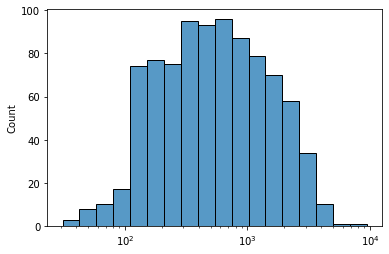

In [23]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(sns)

# importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.histplot(LCBfrags,log_scale=True)
# sns.histplot(LCBfrags)
